# Weekly Project 1

Using the image "appletree.jpg"

1) Can you segment the apples from the tree?

In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Segmented image')

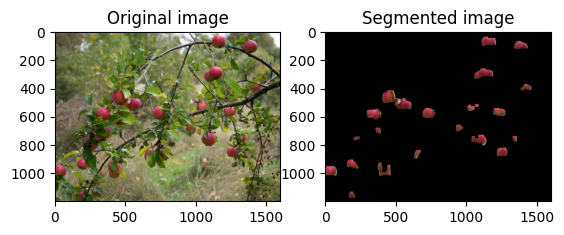

In [2]:
path = "C:/Users/shaia/Documents/Opgaveregning/AutoSys/4. semester/Perception for autonome systemer/Projekt/Projekt 1/"
image_name = "appletree.jpg"

bgr_img = cv2.imread(path + image_name)
b,g,r = cv2.split(bgr_img)
image = cv2.merge([r,g,b])

mask = np.zeros(image[:, :, 0].shape, dtype="uint8")

for h in range(image.shape[0]):
    for w in range(image.shape[1]):
        if image[h, w, 0] > 100 and image[h, w, 1] < 80 and image[h, w, 2] < 150:
            mask[h, w] = 255
            
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))

mask_morph = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel_dilate)
mask_morph = cv2.morphologyEx(mask_morph, cv2.MORPH_OPEN, kernel_open)
mask_morph = cv2.morphologyEx(mask_morph, cv2.MORPH_CLOSE, kernel_open)

segment = cv2.bitwise_and(image, image, mask=mask_morph)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.imshow(segment)
plt.title("Segmented image")

2) Can you get the computer to count how many there are? 
    How close can you get to the ground truth? (there are 26 apples in the image)

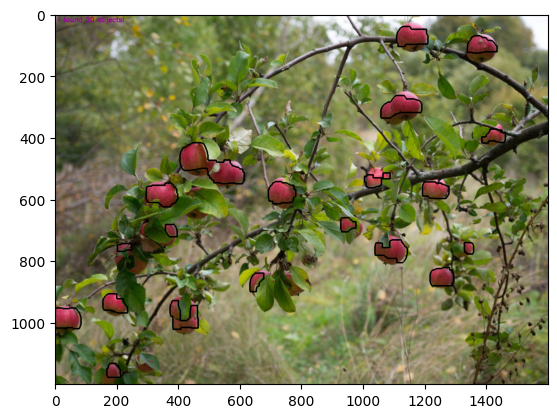

In [3]:
cnts = cv2.findContours(mask_morph.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

3) Can you change the color of one of them?

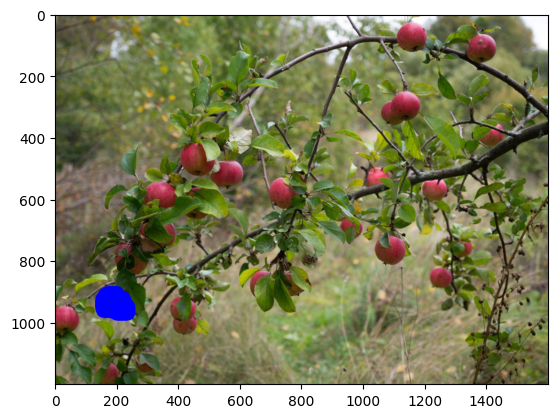

In [4]:
one_apple = image.copy()
cv2.drawContours(one_apple, [cnts[3]], -1, (0, 0, 255), 50)
plt.imshow(one_apple)

4) Can you segment the leaves?

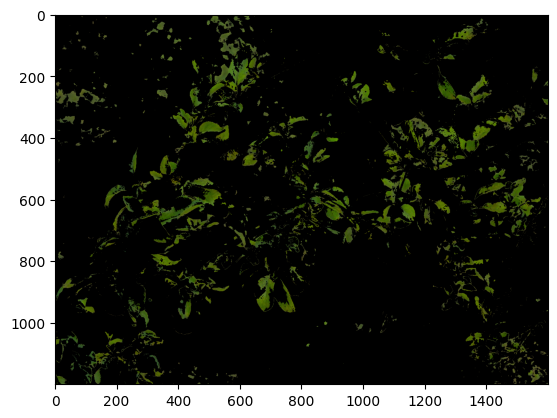

In [5]:
mask_leave = np.zeros(image[:, :, 0].shape, dtype="uint8")

for h in range(image.shape[0]):
    for w in range(image.shape[1]):
        if image[h, w, 0] < 100 and image[h, w, 1] > 80 and image[h, w, 2] < 50:
            mask_leave[h, w] = 255

segment_leave = cv2.bitwise_and(image, image, mask=mask_leave)
plt.imshow(segment_leave)

# Weekly project part 2

1) Remove the greenscreen and replace the background in "itssp.png".

Text(0.5, 1.0, 'Removed green screen')

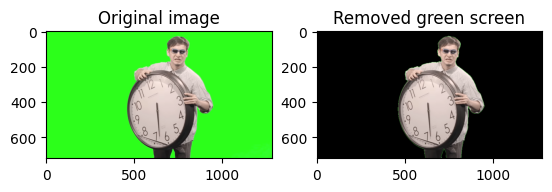

In [6]:
image_name = "ittsp.png"

bgr_img = cv2.imread(path + image_name)
b,g,r = cv2.split(bgr_img)
image = cv2.merge([r,g,b])

mask = 255 * np.ones(image[:, :, 0].shape, dtype="uint8")

for h in range(image.shape[0]):
    for w in range(image.shape[1]):
        if image[h, w, 0] < 100 and image[h, w, 1] > 200 and image[h, w, 2] < 100:
            mask[h, w] = 0

segment = cv2.bitwise_and(image, image, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.imshow(segment)
plt.title("Removed green screen")

2) Can you improve the edge with eroding/dilating?

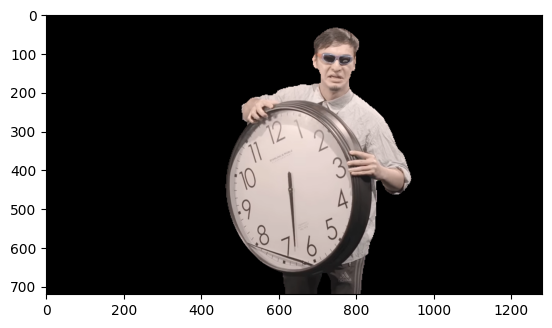

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
mask_morph = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)

segment_clean = cv2.bitwise_and(image, image, mask=mask_morph)
plt.imshow(segment_clean)